In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import time

# Exercício 1

## 1.1 

### a)

In [3]:
def generate_pattern(size):
    """Generate a random bit pattern of specified size"""
    return np.random.randint(0, 2, size)

pattern_size = 8
target = generate_pattern(pattern_size)
print(f"Target pattern (size {pattern_size}):", target)

Target pattern (size 8): [0 1 0 1 1 0 1 1]


### b)

In [4]:
# Análise de pesquisa aleatória

def random_search(target, max_attempts=1000000):
    """
    Try to find the target pattern by generating random patterns.
    Returns number of attempts and time taken.
    """
    size = len(target)
    attempts = 0
    start_time = time.time()
    
    while attempts < max_attempts:
        attempts += 1
        guess = generate_pattern(size)
        
        if np.array_equal(guess, target):
            elapsed = time.time() - start_time
            return attempts, elapsed
    
    elapsed = time.time() - start_time
    return attempts, elapsed

np.random.seed(42)
small_target = generate_pattern(4)
attempts, elapsed = random_search(small_target)
print(f"\nRandom search test:")
print(f"Target: {small_target}")
print(f"Found in {attempts} attempts, {elapsed:.4f} seconds")



Random search test:
Target: [0 1 0 0]
Found in 1 attempts, 0.0063 seconds


In [5]:
pattern_sizes = [2, 4, 6, 8, 10, 12]
n_tests = 30
max_time_seconds = 3600  # 1 hour limit

results = {size: {'attempts': [], 'times': []} for size in pattern_sizes}

print("Running experiments for different pattern sizes...")
print("(stopping if execution time exceeds 1 hour)\n")

for size in pattern_sizes:
    print(f"Testing size {size}...")
    
    # Use fixed seeds for reproducibility
    for seed in range(n_tests):
        np.random.seed(seed)
        target = generate_pattern(size)
        
        start = time.time()
        attempts, elapsed = random_search(target, max_attempts=10000000)
        
        results[size]['attempts'].append(attempts)
        results[size]['times'].append(elapsed)
        
        # Check if we're taking too long
        if elapsed > max_time_seconds / n_tests:
            print(f"  Warning: Size {size} taking too long, limiting tests")
            break
    
    avg_time = np.mean(results[size]['times'])
    avg_attempts = np.mean(results[size]['attempts'])
    print(f"  Size {size}: avg {avg_attempts:.0f} attempts, avg {avg_time:.4f}s")
    
    # Stop if average time is too high
    if avg_time * n_tests > max_time_seconds * 0.5:
        print(f"\nStopping at size {size} (projected time too high)")
        pattern_sizes = [s for s in pattern_sizes if s <= size]
        break

Running experiments for different pattern sizes...
(stopping if execution time exceeds 1 hour)

Testing size 2...
  Size 2: avg 3 attempts, avg 0.0000s
Testing size 4...
  Size 4: avg 21 attempts, avg 0.0002s
Testing size 6...
  Size 6: avg 65 attempts, avg 0.0010s
Testing size 8...
  Size 8: avg 223 attempts, avg 0.0027s
Testing size 10...
  Size 10: avg 985 attempts, avg 0.0115s
Testing size 12...
  Size 12: avg 4163 attempts, avg 0.0510s


C:\Users\Ana Maria Ribeiro\AppData\Local\Temp\ipykernel_20088\805491834.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(attempts_data, labels=pattern_sizes)
C:\Users\Ana Maria Ribeiro\AppData\Local\Temp\ipykernel_20088\805491834.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(times_data, labels=pattern_sizes)


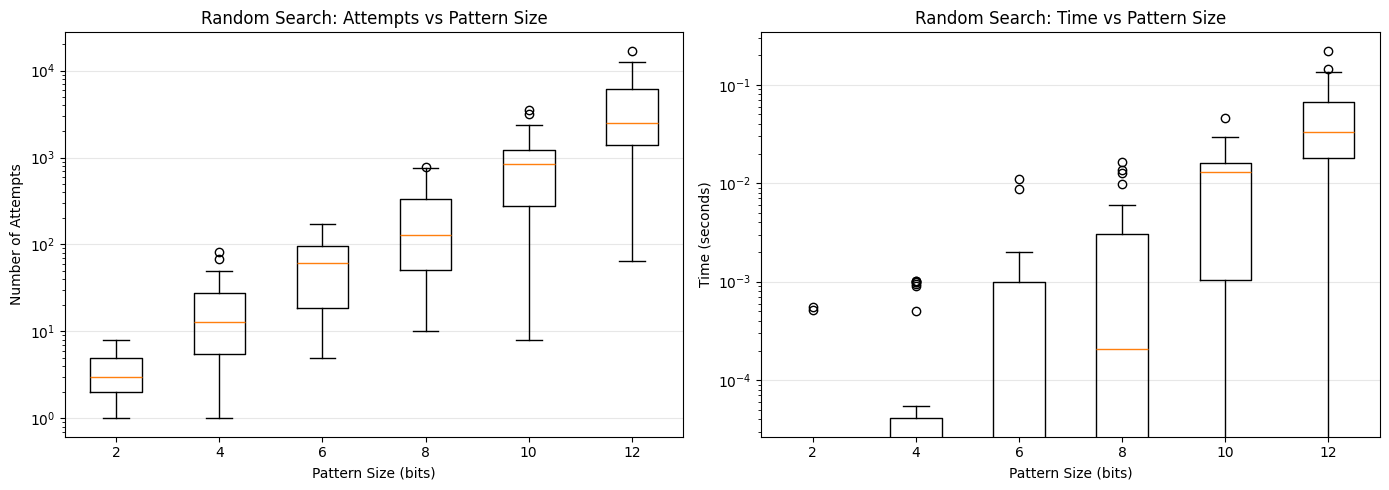


Comparison of attempts and execution times:
Size  2:          3 attempts,   0.0000s
Size  4:         21 attempts,   0.0002s
Size  6:         65 attempts,   0.0010s
Size  8:        223 attempts,   0.0027s
Size 10:        985 attempts,   0.0115s
Size 12:       4163 attempts,   0.0510s

Using pattern size 12 for remaining exercises


In [6]:
# Plots

# Plot 1: Tentativas vs. Tamanho do padrão
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

attempts_data = [results[size]['attempts'] for size in pattern_sizes]
ax1.boxplot(attempts_data, labels=pattern_sizes)
ax1.set_xlabel('Pattern Size (bits)')
ax1.set_ylabel('Number of Attempts')
ax1.set_title('Random Search: Attempts vs Pattern Size')
ax1.grid(alpha=0.3, axis='y')
ax1.set_yscale('log')

# Plot 2: Tempo vs. tamanho do padrão
times_data = [results[size]['times'] for size in pattern_sizes]
ax2.boxplot(times_data, labels=pattern_sizes)
ax2.set_xlabel('Pattern Size (bits)')
ax2.set_ylabel('Time (seconds)')
ax2.set_title('Random Search: Time vs Pattern Size')
ax2.grid(alpha=0.3, axis='y')
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

print("\nComparison of attempts and execution times:")
for size in pattern_sizes:
    avg_att = np.mean(results[size]['attempts'])
    avg_time = np.mean(results[size]['times'])
    print(f"Size {size:2d}: {avg_att:10.0f} attempts, {avg_time:8.4f}s")

# selecionar o maior tamanho possível
working_size = max(pattern_sizes)
print(f"\nUsing pattern size {working_size} for remaining exercises")

### c)

In [7]:
# função de fitness

def fitness(guess, target):
    """
    Measure fitness of a guess compared to target.
    Maximum when patterns match exactly, decreases with distance.
    Using Hamming distance (number of matching bits).
    """
    return np.sum(guess == target)

# Testar
np.random.seed(42)
target = generate_pattern(8)
guess1 = target.copy()
guess2 = generate_pattern(8)
guess3 = np.ones(8, dtype=int) - target  # Padrão oposto

print(f"Target:   {target}")
print(f"Guess 1:  {guess1} -> fitness: {fitness(guess1, target)}/{len(target)} (perfect match)")
print(f"Guess 2:  {guess2} -> fitness: {fitness(guess2, target)}/{len(target)}")
print(f"Guess 3:  {guess3} -> fitness: {fitness(guess3, target)}/{len(target)} (opposite)")


Target:   [0 1 0 0 0 1 0 0]
Guess 1:  [0 1 0 0 0 1 0 0] -> fitness: 8/8 (perfect match)
Guess 2:  [0 1 0 0 0 0 1 0] -> fitness: 6/8
Guess 3:  [1 0 1 1 1 0 1 1] -> fitness: 0/8 (opposite)


### d)

Hill Climbing with Mutation

Target: [0 1 0 0 0 1 0 0 0 1 0 0]

Running hill climbing (max 1000 mutations)...

Result:   [0 1 0 0 0 1 0 0 0 1 0 0]
Fitness:  12/12
Mutations: 20
Converged: Yes


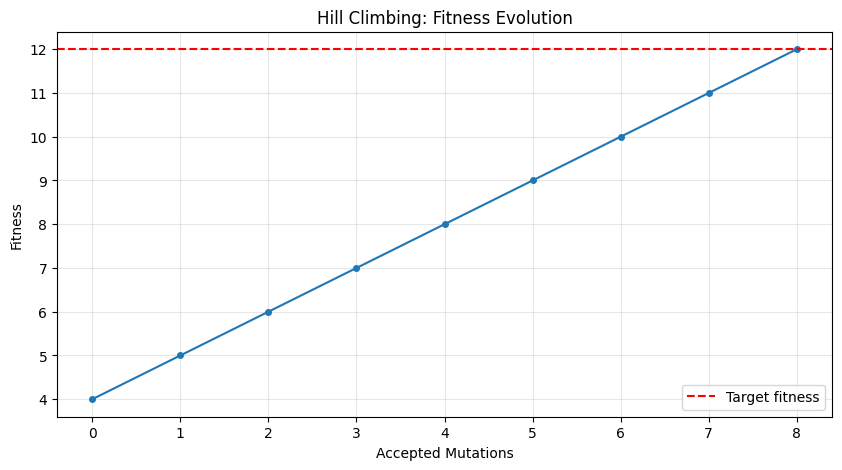


Testing convergence over 30 runs...

Convergence rate: 100.0% (30/30)
Average mutations when converged: 26.3

Conclusion: Hill climbing does NOT always converge to the correct solution
It gets stuck in local optima where no single bit flip improves fitness.


In [8]:
def mutate(pattern):
    """Flip one random bit in the pattern"""
    mutated = pattern.copy()
    idx = np.random.randint(len(pattern))
    mutated[idx] = 1 - mutated[idx]
    return mutated

def hill_climbing(target, max_mutations=1000):
    """
    Use hill climbing with mutation to find target.
    Only accept mutations that improve fitness.
    """
    size = len(target)
    current = generate_pattern(size)
    current_fitness = fitness(current, target)
    
    mutations = 0
    fitness_history = [current_fitness]
    
    while mutations < max_mutations:
        candidate = mutate(current)
        candidate_fitness = fitness(candidate, target)
        
        # aceitar se melhor
        if candidate_fitness > current_fitness:
            current = candidate
            current_fitness = candidate_fitness
            fitness_history.append(current_fitness)
        
        mutations += 1
        
        # confirmar se encontrou uma melhor solução
        if current_fitness == size:
            return current, mutations, True, fitness_history
    
    return current, mutations, False, fitness_history

# testar hill climbing
print("Hill Climbing with Mutation\n")
np.random.seed(42)
target = generate_pattern(working_size)

print(f"Target: {target}")
print(f"\nRunning hill climbing (max 1000 mutations)...\n")

solution, mutations, converged, history = hill_climbing(target, max_mutations=1000)

print(f"Result:   {solution}")
print(f"Fitness:  {fitness(solution, target)}/{len(target)}")
print(f"Mutations: {mutations}")
print(f"Converged: {'Yes' if converged else 'No'}")

# Plot evolução da fitness
plt.figure(figsize=(10, 5))
plt.plot(history, marker='o', markersize=4)
plt.axhline(y=len(target), color='r', linestyle='--', label='Target fitness')
plt.xlabel('Accepted Mutations')
plt.ylabel('Fitness')
plt.title('Hill Climbing: Fitness Evolution')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


# teste com 30 execuções
n_runs = 30
convergence_results = []
mutation_counts = []

print(f"\nTesting convergence over {n_runs} runs...\n")

for seed in range(n_runs):
    np.random.seed(seed)
    target = generate_pattern(working_size)
    solution, mutations, converged, _ = hill_climbing(target, max_mutations=1000)
    
    convergence_results.append(converged)
    mutation_counts.append(mutations if converged else 1000)

convergence_rate = np.mean(convergence_results) * 100
avg_mutations = np.mean([m for m, c in zip(mutation_counts, convergence_results) if c])

print(f"Convergence rate: {convergence_rate:.1f}% ({sum(convergence_results)}/{n_runs})")
if sum(convergence_results) > 0:
    print(f"Average mutations when converged: {avg_mutations:.1f}")
else:
    print("No runs converged")

print("\nConclusion: Hill climbing does NOT always converge to the correct solution")
print("It gets stuck in local optima where no single bit flip improves fitness.")


## 1.2

Genetic Algorithm with Selection and Mutation

Target: [0 1 0 0 0 1 0 0 0 1 0 0]
Population size: 100, Elite: 30%, Max generations: 100

Result:     [0 1 0 0 0 1 0 0 0 1 0 0]
Fitness:    12/12
Generations: 2
Converged:  Yes


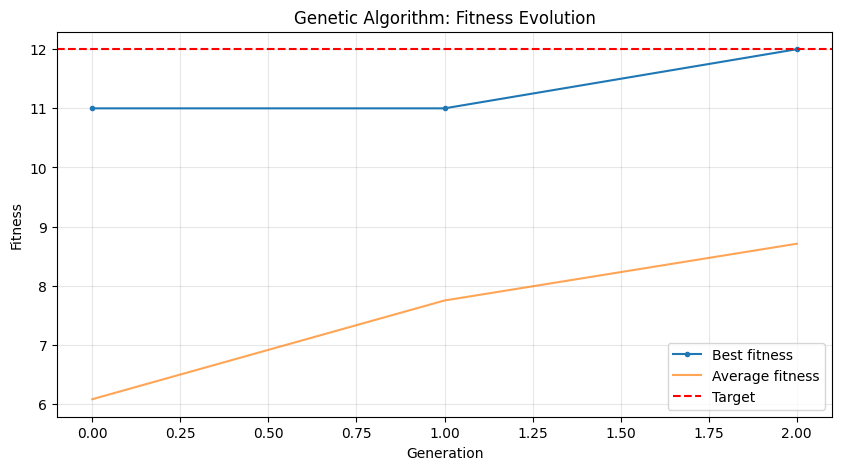

In [10]:
def genetic_algorithm_mutation(target, pop_size=100, generations=100, elite_ratio=0.3):
    """
    Genetic algorithm using selection and mutation.
    - Keep top 30% as elite
    - Generate remaining 70% by mutating elite
    """
    size = len(target) # definir número de bits
    n_elite = int(pop_size * elite_ratio) # selecionar os melhores 30%
    
    # inicializar a população
    population = [generate_pattern(size) for _ in range(pop_size)]
    
    # guardar o histórico relativo aos melhores e à média fitness
    best_fitness_history = []
    avg_fitness_history = []
    generation = 0
    stagnation = 0
    prev_best = 0
    
    while generation < generations: # repetir até atingir o número máximo de gerações (ou estagnar)
        # avaliar cada indivíduo com a função fitness (quantos bits certos)
        fitnesses = [fitness(ind, target) for ind in population]
        
        # adicionar ao histórico os valores
        best_fitness = max(fitnesses)
        avg_fitness = np.mean(fitnesses)
        
        best_fitness_history.append(best_fitness)
        avg_fitness_history.append(avg_fitness)
        
        # confirmar se existe uma solução
        if best_fitness == size:
            return population[np.argmax(fitnesses)], generation, True, best_fitness_history, avg_fitness_history
        
        # verificar se estagnou
        if best_fitness == prev_best:
            stagnation += 1
            if stagnation >= 20:  # parar se não houver uma melhoria nas últimas 20 gerações
                break
        else:
            stagnation = 0
            prev_best = best_fitness
        
        # seleção dos melhores indivíduos
        sorted_indices = np.argsort(fitnesses)[::-1]
        elite = [population[i] for i in sorted_indices[:n_elite]]
        
        # criar uma nova população
        new_population = elite.copy()  # 30% elite
        
        # 70% por mutação de um dos indivíduos de elite
        while len(new_population) < pop_size:
            parent = elite[np.random.randint(n_elite)]
            offspring = mutate(parent)
            new_population.append(offspring)
        
        population = new_population
        generation += 1
    
    # avaliação final
    fitnesses = [fitness(ind, target) for ind in population]
    best_idx = np.argmax(fitnesses)
    
    return population[best_idx], generation, False, best_fitness_history, avg_fitness_history

# testar algoritmo genético
print("Genetic Algorithm with Selection and Mutation\n")
np.random.seed(42)
target = generate_pattern(working_size)

print(f"Target: {target}")
print(f"Population size: 100, Elite: 30%, Max generations: 100\n")

solution, gens, converged, best_hist, avg_hist = genetic_algorithm_mutation(target, generations=100)

print(f"Result:     {solution}")
print(f"Fitness:    {fitness(solution, target)}/{len(target)}")
print(f"Generations: {gens}")
print(f"Converged:  {'Yes' if converged else 'No'}")

# plot
plt.figure(figsize=(10, 5))
plt.plot(best_hist, label='Best fitness', marker='o', markersize=3)
plt.plot(avg_hist, label='Average fitness', alpha=0.7)
plt.axhline(y=len(target), color='r', linestyle='--', label='Target')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Genetic Algorithm: Fitness Evolution')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Comparing methods over 30 runs (pattern size 12)...

Results summary:

Random Search:
  Success rate: 100.0%
  Avg attempts: 4163
  Avg time: 0.0492s

Hill Climbing:
  Success rate: 100.0%
  Avg attempts: 32
  Avg time: 0.0002s

GA (Mutation):
  Success rate: 100.0%
  Avg attempts: 337
  Avg time: 0.0046s



C:\Users\Ana Maria Ribeiro\AppData\Local\Temp\ipykernel_20088\706990031.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(attempts_data, labels=['Random', 'Hill Climb', 'GA'])
C:\Users\Ana Maria Ribeiro\AppData\Local\Temp\ipykernel_20088\706990031.py:67: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(times_data, labels=['Random', 'Hill Climb', 'GA'])


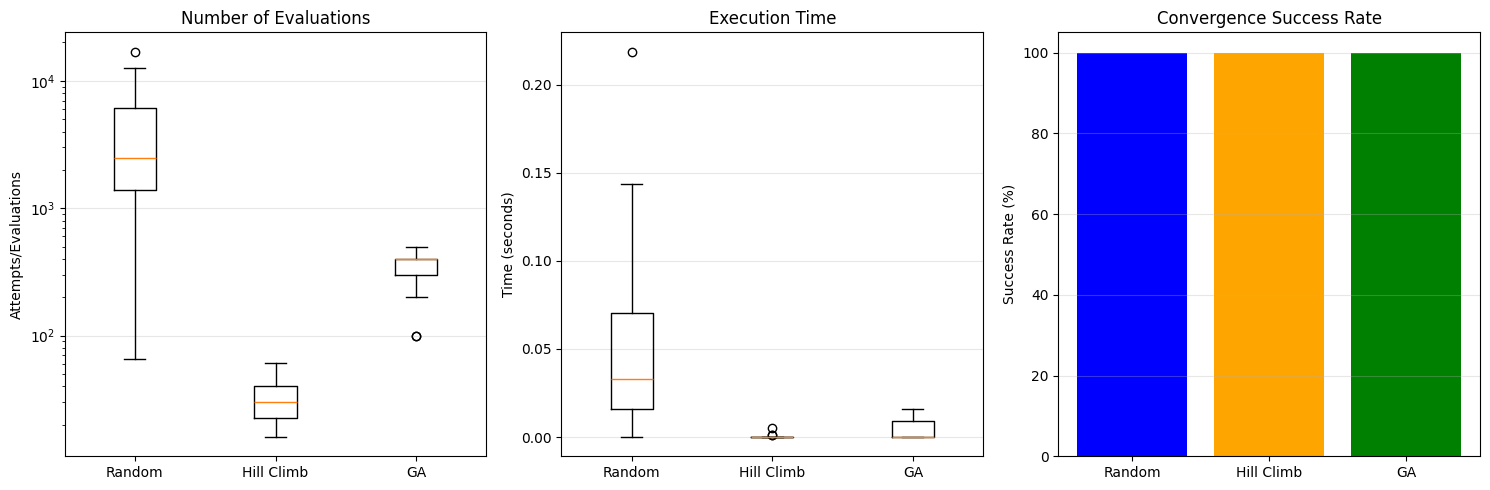

In [11]:
# comparação de métodos: Random, Hill Climbing e GA (com 30 execuções cada)

n_tests = 30
methods = {
    'Random Search': {'attempts': [], 'times': [], 'success': []},
    'Hill Climbing': {'attempts': [], 'times': [], 'success': []},
    'GA (Mutation)': {'attempts': [], 'times': [], 'success': []}
}

print(f"Comparing methods over {n_tests} runs (pattern size {working_size})...\n")

for seed in range(n_tests):
    np.random.seed(seed)
    target = generate_pattern(working_size)
    
    # Random Search
    start = time.time()
    attempts, _ = random_search(target, max_attempts=100000)
    elapsed = time.time() - start
    success = attempts < 100000
    methods['Random Search']['attempts'].append(attempts)
    methods['Random Search']['times'].append(elapsed)
    methods['Random Search']['success'].append(success)
    
    # Hill Climbing
    start = time.time()
    _, mutations, converged, _ = hill_climbing(target, max_mutations=1000)
    elapsed = time.time() - start
    methods['Hill Climbing']['attempts'].append(mutations)
    methods['Hill Climbing']['times'].append(elapsed)
    methods['Hill Climbing']['success'].append(converged)
    
    # Genetic Algorithm
    start = time.time()
    _, gens, converged, _, _ = genetic_algorithm_mutation(target, generations=100)
    elapsed = time.time() - start
    # contar o número de avaliações: pop_size * generations
    evaluations = 100 * gens
    methods['GA (Mutation)']['attempts'].append(evaluations)
    methods['GA (Mutation)']['times'].append(elapsed)
    methods['GA (Mutation)']['success'].append(converged)

print("Results summary:\n")
for method, data in methods.items():
    success_rate = np.mean(data['success']) * 100
    avg_attempts = np.mean(data['attempts'])
    avg_time = np.mean(data['times'])
    print(f"{method}:")
    print(f"  Success rate: {success_rate:.1f}%")
    print(f"  Avg attempts: {avg_attempts:.0f}")
    print(f"  Avg time: {avg_time:.4f}s\n")


# Plot das comparações
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Attempts/Evaluations
attempts_data = [methods[m]['attempts'] for m in ['Random Search', 'Hill Climbing', 'GA (Mutation)']]
axes[0].boxplot(attempts_data, labels=['Random', 'Hill Climb', 'GA'])
axes[0].set_ylabel('Attempts/Evaluations')
axes[0].set_title('Number of Evaluations')
axes[0].grid(alpha=0.3, axis='y')
axes[0].set_yscale('log')

# Plot 2: Time
times_data = [methods[m]['times'] for m in ['Random Search', 'Hill Climbing', 'GA (Mutation)']]
axes[1].boxplot(times_data, labels=['Random', 'Hill Climb', 'GA'])
axes[1].set_ylabel('Time (seconds)')
axes[1].set_title('Execution Time')
axes[1].grid(alpha=0.3, axis='y')

# Plot 3: Success Rate
success_rates = [np.mean(methods[m]['success'])*100 for m in ['Random Search', 'Hill Climbing', 'GA (Mutation)']]
axes[2].bar(['Random', 'Hill Climb', 'GA'], success_rates, color=['blue', 'orange', 'green'])
axes[2].set_ylabel('Success Rate (%)')
axes[2].set_title('Convergence Success Rate')
axes[2].set_ylim([0, 105])
axes[2].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 1.3

# Exercício 2

# Exercício 3